# Individual Prediction

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Load Previous Trained Model

In [2]:
# Load the saved Random Forest model
model_folder = "../2_Modeling_Phase/Saved-Models/"
model_filename = "IoMT_AI_IDS_XGBoost.joblib"
model_path = model_folder + model_filename

model = joblib.load(model_path)

Load Train Dataset

In [3]:
df_train = pd.read_csv("../0_Datasets/Farm-Flow/train.csv")

Load Test Dataset

In [4]:
df_test = pd.read_csv("../0_Datasets/Farm-Flow/test.csv")

In [5]:
display(df_train)

fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
0         -0.236304     -0.662387          -0.577140          -0.443123   
1         -0.672105     -0.457813          -0.577140          -0.443123   
2         -0.454205     -0.662387          -0.577140          -0.443123   
3          2.378496      2.406229           2.285759           2.444445   
4         -0.672105     -0.457813          -0.577140          -0.443123   
...             ...           ...                ...                ...   
47341     -0.454205     -0.457813          -0.577140          -0.443123   
47342     -0.454205     -0.662387          -0.577140          -0.443123   
47343      2.160596      1.997080           2.285759           2.444445   
47344      1.288996      1.383357           1.713179           0.711904   
47345     -0.672105     -0.457813          -0.577140          -0.443123   

       fwd_pkts_per_sec  bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  \
0             -0.277741         -0.268577          -0.273647      -1.394192   
1              0.490111          0.504662           0.498222       0.728588   
2             -0.277918         -0.268577          -0.273736      -1.394192   
3             -0.276874         -0.267504          -0.272675       0.728588   
4             -0.277823         -0.268460          -0.273629       0.728588   
...                 ...               ...                ...            ...   
47341         -0.276776         -0.267991          -0.272869      -0.332802   
47342         -0.277509         -0.268577          -0.273530      -1.394192   
47343         -0.276943         -0.267646          -0.272781       0.576960   
47344         -0.265775         -0.256330          -0.261520       0.728588   
47345         -0.277865         -0.268501          -0.273671       0.728588   

       fwd_header_size_tot  fwd_header_size_min  ...  flow_pkts_payload.max  \
0                -0.643844            -1.423582  ...              -0.562720   
1                -0.643844             0.278456  ...              -0.562720   
2                -0.724235            -1.423582  ...              -0.562720   
3                 2.129645            -0.147053  ...              -0.240860   
4                -0.684039            -0.147053  ...              -0.562720   
...                    ...                  ...  ...                    ...   
47341            -0.483062            -0.147053  ...              -0.562720   
47342            -0.724235            -1.423582  ...              -0.562720   
47343             1.928668            -0.147053  ...              -0.240860   
47344             2.330623             1.129475  ...              -0.250326   
47345            -0.684039            -0.147053  ...              -0.562720   

       flow_pkts_payload.tot  flow_pkts_payload.avg  flow_pkts_payload.std  \
0                  -0.744570              -0.562649              -0.557806   
1                  -0.744570              -0.562649              -0.557806   
2                  -0.744570              -0.562649              -0.557806   
3                   1.678331              -0.105550              -0.268638   
4                  -0.744570              -0.562649              -0.557806   
...                      ...                    ...                    ...   
47341              -0.744570              -0.562649              -0.557806   
47342              -0.744570              -0.562649              -0.557806   
47343               1.678331              -0.054762              -0.267306   
47344               0.400251              -0.238680              -0.346375   
47345              -0.744570              -0.562649              -0.557806   

       fwd_subflow_pkts  bwd_subflow_pkts  fwd_subflow_bytes  \
0             -0.556874         -0.638986          -0.741186   
1             -0.556874         -0.419418          -0.741186   
2             -0.556874         -0.638986          -0.741186   
3              

In [6]:
display(df_test)

fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
0         -0.672105     -0.457813          -0.577140          -0.443123   
1         -0.672105     -0.457813          -0.577140          -0.443123   
2         -0.454205     -0.457813          -0.577140          -0.443123   
3          2.378496      2.406229           2.285759           2.444445   
4         -0.454205     -0.253238          -0.004560          -0.443123   
...             ...           ...                ...                ...   
15778      1.942696      2.201655           2.285759           2.444445   
15779      2.160596      2.201655           2.285759           2.444445   
15780     -0.236304     -0.662387          -0.577140          -0.443123   
15781     -0.454205     -0.662387          -0.577140          -0.443123   
15782     -0.236304     -0.662387          -0.577140          -0.443123   

       fwd_pkts_per_sec  bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  \
0             -0.276940         -0.267571          -0.272742       0.728588   
1             -0.277181         -0.267813          -0.272983       0.728588   
2             -0.276909         -0.268058          -0.272969      -0.332802   
3             -0.276907         -0.267537          -0.272708       0.728588   
4             -0.276892         -0.267522          -0.272693       0.728588   
...                 ...               ...                ...            ...   
15778         -0.277003         -0.267561          -0.272768       0.891878   
15779         -0.276991         -0.267622          -0.272793       0.728588   
15780         -0.277906         -0.268577          -0.273730      -1.394192   
15781         -0.277687         -0.268577          -0.273620      -1.394192   
15782         -0.277882         -0.268577          -0.273718      -1.394192   

       fwd_header_size_tot  fwd_header_size_min  ...  flow_pkts_payload.max  \
0                -0.684039            -0.147053  ...              -0.562720   
1                -0.684039            -0.147053  ...              -0.562720   
2                -0.483062            -0.147053  ...              -0.562720   
3                 2.129645            -0.147053  ...              -0.240860   
4                -0.241889             1.129475  ...              -0.477522   
...                    ...                  ...  ...                    ...   
15778             1.727690            -0.147053  ...              -0.240860   
15779             1.928668            -0.147053  ...              -0.240860   
15780            -0.643844            -1.423582  ...              -0.562720   
15781            -0.724235            -1.423582  ...              -0.562720   
15782            -0.643844            -1.423582  ...              -0.562720   

       flow_pkts_payload.tot  flow_pkts_payload.avg  flow_pkts_payload.std  \
0                  -0.744570              -0.562649              -0.557806   
1                  -0.744570              -0.562649              -0.557806   
2                  -0.744570              -0.562649              -0.557806   
3                   1.678331              -0.105550              -0.268638   
4                  -0.635539              -0.408378              -0.455263   
...                      ...                    ...                    ...   
15778               1.678331              -0.054762              -0.267306   
15779               1.678331              -0.072901              -0.267431   
15780              -0.744570              -0.562649              -0.557806   
15781              -0.744570              -0.562649              -0.557806   
15782              -0.744570              -0.562649              -0.557806   

       fwd_subflow_pkts  bwd_subflow_pkts  fwd_subflow_bytes  \
0             -0.556874         -0.419418          -0.741186   
1             -0.556874         -0.419418          -0.741186   
2             -0.329944         -0.419418          -0.741186   
3              

-----
## Train and Test Datasets

Drop Multiclass Column

In [7]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

Excluding the target variable

In [8]:
X_columns = df_train.columns.drop('is_attack')

Create a feature matrix X by selecting only the columns specified in X_columns. Then convert the selected data into a NumPy array.

In [9]:
X = df_train[X_columns].values

Creates a target variable y containing the target variable

In [10]:
y = df_train["is_attack"].values

Split into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Get Features Names and Class Names

In [12]:
feature_names = list(X_columns)
class_names = ["Normal", "Malicious"]
response_dict = {0: 'Normal', 1: 'Malicious'}

Generate Prediction

In [13]:
pred = model.predict(X_test)

Labeled Df's

In [14]:
X_test_labeled = pd.DataFrame(X_test, columns=feature_names)
X_train_labeled = pd.DataFrame(X_train, columns=feature_names)

# Since both are one-dimensional NumPy arrays
pred_series = pd.Series(pred)
y_test_target_series = pd.Series(y_test)
y_train_target_series = pd.Series(y_train)

Create a subset of the Train DF for faster training

In [15]:
subset_percentage = 0.1
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, test_size=1 - subset_percentage, stratify=y_train)

In [16]:
subset_percentage = 0.1
X_subset_labeled, _, y_subset_labeled, _ = train_test_split(X_train_labeled, y_train_target_series, test_size=1 - subset_percentage, stratify=y_train_target_series)

Row to explain

In [17]:
idx = 0

---

## Anchor

In [18]:
from anchor import utils
from anchor import anchor_tabular

explainer = anchor_tabular.AnchorTabularExplainer(
    class_names,
    feature_names,
    X_train)

np.random.seed(1)
exp = explainer.explain_instance(X_test[idx], model.predict, threshold=0.95)

exp.show_in_notebook()

## Dalex

In [19]:
import dalex as dx

exp = dx.Explainer(model, X_train_labeled, y_train_target_series)

Preparation of a new explainer is initiated

  -> data              : 35509 rows 33 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 35509 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x0000015B8EC17BA0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.53, mean = 0.998, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.303, max = 0.47
  -> model_info        : package xgboost

A new explainer has been created!


C:\Users\ivoafonsobispo\anaconda3\Lib\site-packages\dalex\predict_explanations\_break_down\utils.py:124: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  average_yhats_norm[i] = average_yhats[i] - diffs_1d[inds.iloc[i, 0]] - diffs_1d.iloc[inds.iloc[i, 1]]
C:\Users\ivoafonsobispo\anaconda3\Lib\site-packages\dalex\predict_explanations\_break_down\utils.py:124: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  average_yhats_norm[i] = average_yhats[i] - diffs_1d[inds.iloc[i, 0]] - diffs_1d.iloc[inds.iloc[i, 1]]
C:\Users\ivoafonsobispo\anaconda3\Lib\site-packages\dalex\predict_explanations\_break_down\utils.py:124: FutureWarning

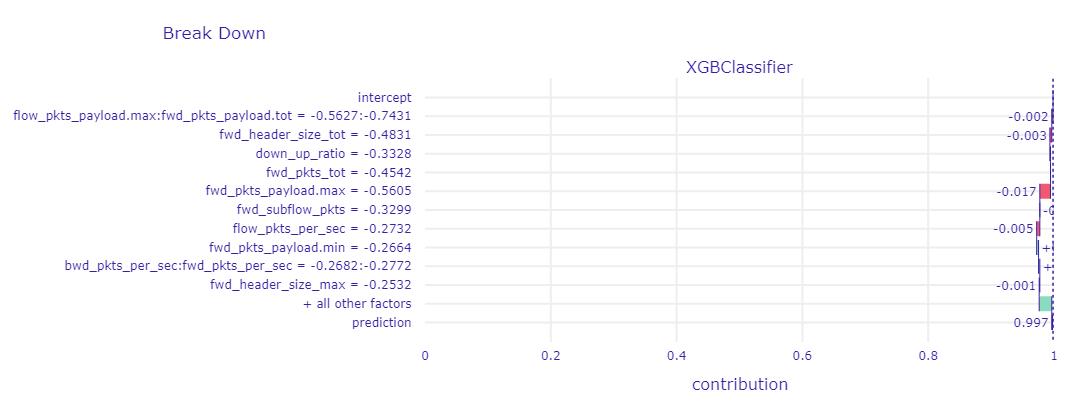

In [20]:
exp.predict_parts(X_test_labeled.iloc[idx]).plot(min_max=[0,1])

## LIME

In [21]:
import lime
from interpret.blackbox import LimeTabular
from lime.lime_tabular import LimeTabularExplainer

explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=class_names, discretize_continuous=True)

exp = explainer.explain_instance(X_test[idx], model.predict_proba, num_features=33, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)

## SHAP

In [22]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

Predicted: 1


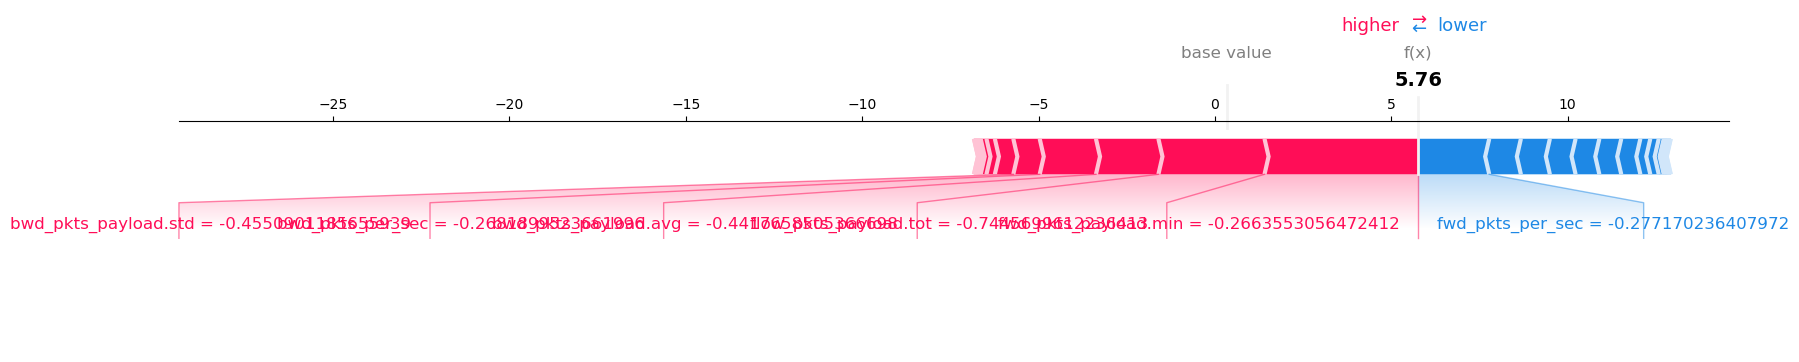

In [23]:
prediction = model.predict(X_test)

print(f"Predicted: {prediction[idx]}")

shap.force_plot(explainer.expected_value,
                shap_values[idx],
                X_test[idx],
                feature_names=feature_names,
                matplotlib=True)

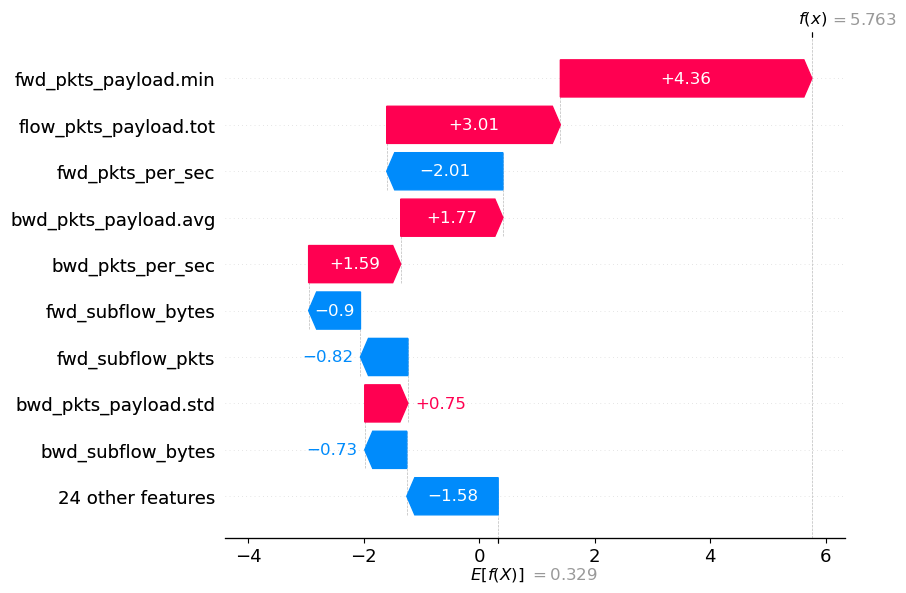

In [24]:
base_value = explainer.expected_value

# Change shap_values[0] or shap_values[1], if you want explaination for 'Normal' or 'Malicious'
explanation = shap.Explanation(values=shap_values[0], base_values=base_value,feature_names=feature_names)

shap.plots.waterfall(explanation)

## InterpretML

In [25]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

from interpret import show
from interpret.blackbox import ShapKernel

In [26]:
shap = ShapKernel(model, X_test_labeled, feature_names=feature_names)
#shap = ShapKernel(model, X_subset_labeled, feature_names=feature_names)

shap_local = shap.explain_local(X_test_labeled[idx:idx+1], y_test_target_series[idx:idx+1])
show(shap_local, 0)

Using 11837 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
from interpret.blackbox import LimeTabular

lime = LimeTabular(model, X_test_labeled,feature_names=feature_names)

show(lime.explain_local(X_test_labeled[idx:idx+1], y_test_target_series[idx:idx+1]), 0)

## Shapash

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer

response_dict = {0: 'Normal', 1: 'Malicious'}

xpl = SmartExplainer(model=model,
                     label_dict=response_dict)

xpl.compile(
    x=X_test_labeled,
    y_pred=pred_series
)

xpl.plot.compare_plot(index=[X_test_labeled.index[idx]])

## Explainer Dashboard

In [ ]:
import re

def clean_feature_name(feature_name):
    cleaned_name = re.sub(r'[^a-zA-Z0-9_]', '_', feature_name)
    return cleaned_name

cleaned_feature_names = [clean_feature_name(feature) for feature in X_test_labeled.columns]

X_test_labeled.columns = cleaned_feature_names
y_test_target_series.columns = cleaned_feature_names

from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer = ClassifierExplainer(model, X_test_labeled, y_test_target_series)

ExplainerDashboard(explainer).run()

----------
## Notes:
- Archor, Dalex, LIME, and InterpretML, all gave me the same result that the model for that instance predicted that the instance was malicious because: "fwd_pkts_payload.tot <= -0.74"
- SHAP and SHAPASH I got different results saying that "bwd_pkts_per_sec" was the most important feature for the prediction.

1. **Local Interpretability Techniques (LIME, Archor, Dalex, InterpretML):**
- These techniques focus on creating local substitute models or perturbing the input data to understand the impact of each feature on the model prediction for a specific instance.
- They might use techniques like linear models or decision trees to approximate the complex behavior of the underlying model for a given data point.
- The results obtained from these methods heavily depend on the substitute model used and the perturbations applied.

2. **SHAP (SHapley Additive exPlanations):**
- Provide a unique way to distribute the contribution of each feature to the model prediction across all possible feature combinations.
- SHAP values provide a global measure of feature importance, and the values are consistent, meaning the sum of SHAP values for all features equals the difference between the model's output for the given instance and the expected output.

The reason for the discrepancy in feature importance results could be:

- **Local vs. Global Interpretability:**
    - Local interpretability methods might focus more on the specific characteristics of the instance under investigation, while SHAP provides a more global perspective on feature importance.
    - It's possible that the specific instance has a unique combination of feature values, making local methods provide different results.

- **Other Model Variability:**
    - Local interpretability methods rely on creating other models, and the choice of the other model can impact the results. Different libraries may use different models or techniques, leading to variability in feature importance.

- **Feature Interactions:**
    - SHAP values inherently consider interactions between features, providing a more holistic view of how each feature contributes. Local interpretability methods may or may not capture such interactions accurately.
    
    
Q: SHAP takes longer to train than Local Interpretability Techniques, does that mean the SHAP result is more correct then the Local Interpretability Techniques?
The duration of the interpretability technique's computation does not necessarily correlate with the correctness or accuracy of the results. The time taken for computation is more related to the complexity of the algorithm and the underlying computations involved.

- **Accuracy vs. Speed Trade-off:**
    - SHAP values aim to provide accurate and theoretically grounded feature importance values, but the computation can be time-consuming.
    - Local interpretability techniques might sacrifice some accuracy for speed, especially when dealing with individual instance explanations.
- **Global vs. Local Interpretability:**
    - SHAP provides a global view of feature importance that applies consistently across instances.
    - Local interpretability techniques focus on explaining individual predictions and might not capture the global behavior of the model.
- **Complexity of the Model:**
    - For simpler models or models with fewer features, the computational cost of SHAP might be more manageable.
    
In terms of cybersecurity, it might depend, on the type of traffic we are having. If we want to mitigate zero-day attacks Local Interpretability should be the best choice since we can get a fast response to that problem, meanwhile if the attack was more disruptive SHAP could give a better answer of how the traffic was affected.

**Local Interpretability (e.g., LIME):**
- **Advantages:**
    - Provides quick insights into the behavior of the model for a specific instance, making it useful for rapid response.
    - Particularly valuable for identifying and understanding the reasons behind individual predictions, which can aid in detecting and mitigating zero-day attacks.
    - Can be computationally less expensive, making it suitable for real-time or near-real-time applications.
- **Considerations:**
    - Focuses on local explanations for individual predictions, which may not capture the global behavior of the model.
    - The interpretability might be limited to the specific instance under investigation.

**Global Interpretability (e.g., SHAP):**
- **Advantages:**
    - Provides a comprehensive, global view of feature importance, aiding in understanding the overall behavior of the model.
    - Helps in identifying features that consistently contribute to predictions across various instances, potentially revealing broader patterns or insights.
    - Useful for understanding the impact of features on model predictions in a more general sense.
- **Considerations:**
    - Computationally more expensive, especially for complex models and datasets with many features.
    - Might not provide quick insights into specific instances, making it potentially less suitable for real-time response.

**Choosing the Right Approach:**
- **Zero-Day Attacks:**
    - For rapidly responding to potential zero-day attacks, local interpretability methods can be beneficial. They offer quick insights into why a specific instance is classified in a certain way.
- **Disruptive Attacks:**
    - For more disruptive or widespread attacks, global interpretability methods like SHAP can help in understanding the broader impact on model predictions and identifying consistently influential features.
- **Hybrid Approaches:**
    - Depending on specific needs, a hybrid approach that combines both local and global interpretability techniques. This can provide a well-rounded understanding of your model's behavior, both at the instance level and in a broader context.